In [1]:
# Import Libraries
import IPython
import pandas as pd
import numpy as np

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.offline import  init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Load the data
data = pd.read_csv('data.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
data.shape

(569, 33)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.describe().T

count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               569.0  1.216853e+00  5.516484e-01     0.360200   
perimeter_se             569.0  2.866059e+00  2.021855e+00     0.757000   
area_se                  569.0  4.033708e+01  4.549101e+01     6.802000   
smoothness_se            569.0  7.040979e-03  3.002518e-03     0.001713   
compactness_se           569.0  2.547814e-02  1.790818e-02     0.002252   
concavity_se             569.0  3.189372e-02  3.018606e-02     0.000000   
concave points_se        569.0  1.179614e-02  6.170285e-03     0.000000   
symmetry_se              569.0  2.054230e-02  8.266372e-03     0.007882   
fractal_dimension_se     569.0  3.794904e-03  2.646071e-03     0.000895   
radius_worst             569.0  1.626919e+01  4.833242e+00     7.930000   
texture_worst            569.0  2.567722e+01  6.146258e+00    12.020000   
perimeter_worst          569.0  1.072612e+02  3.360254e+01    50.410000   
area_worst               569.0  8.805831e+02  5.693570e+02   185.200000   
smoothness_worst         569.0  1.323686e-01  2.283243e-02     0.071170   
compactness_worst        569.0  2.542650e-01  1.573365e-01     0.027290   
concavity_worst          569.0  2.721885e-01  2.086243e-01     0.000000   
concave points_worst     569.0  1.146062e-01  6.573234e-02     0.000000   
symmetry_worst           569.0  2.900756e-01  6.186747e-02     0.156500   
fractal_dimension_worst  569.0  8.394582e-02  1.806127e-02     0.055040   
Unnamed: 32                0.0           NaN           NaN          NaN   

                                   25%            50%           75%  \
id                       869218.000000  906024.000000  8.813129e+06   
radius_mean                  11.700000      13.370000  1.578000e+01   
texture_mean                 16.170000      18.840000  2.180000e+01   
perimeter_mean               75.170000      86.240000  1.041000e+02   
area_mean                   420.300000     551.100000  7.827000e+02   
smoothness_mean               0.086370       0.095870  1.053000e-01   
compactness_mean              0.064920       0.092630  1.304000e-01   
concavity_mean                0.029560       0.061540  1.307000e-01   
concave points_mean           0.020310       0.033500  7.400000e-02   
symmetry_mean                 0.161900       0.179200  1.957000e-01   
fractal_dimension_mean        0.057700       0.061540  6.612000e-02   
radius_se                     0.232400       0.324200  4.789000e-01   
texture_se                    0.833900       1.108000  1.474000e+00   
perimeter_se                  1.606000       2.287000  3.357000e+00   
area_se                      17.850000      24.530000  4.519000e+01   
smoothness_se                 0.005169       0.006380  8.146000e-03   
compactness_se                0.013080       0.020450  3.245000e-02   
concavity_se                  0.015090       0.025890  4.205000e-02   
concave points_se             0.007638       0.010930  1.471000e-02   
symmetry_se                   0.015160       0.018730  2.348000e-02   
fractal_dimension_se          0.002248       0.003187  4.5

## 1. Missing Value Treatment

In [6]:
# Drop column Unnamed: 32 & Id
data = data.drop(['Unnamed: 32','id'], axis = 'columns')

In [7]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

#### No Missing value

## 2. Exploratory Data Analysis

##### 1. Diagnosis (M = malignant, B = benign)

In [9]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])

df = data['diagnosis'].value_counts()
colors_pie =  ['lightblue', 'lightpink']
colors_bar =  ['red', 'green']

fig.add_trace(go.Pie(
     values = df.values,
     labels = df.index,
     hole = 0.4,
     marker = dict(colors = colors_pie),
     name = "Diagnosis"), 
     row = 1, col = 1)

fig.add_trace(go.Bar(
     x = df.index,
     y = df.values,
     marker = dict(color = colors_bar),
     name = " Diagnosis Distribution "),
    row = 1, col = 2)

fig.update_layout(
    title_text = "Diagnosis Distribution",
    width =  700,
    height = 350
)

iplot(fig)

##### We have 62.5% of Benign and 37.3% of Malignant

#### 2.  Mean

In [10]:
x = data.drop('diagnosis', axis = 1)
y = data['diagnosis']
x = (x - x.mean()) / (x.std())

df = pd.concat([y, x.iloc[:,1:10]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'texture_mean'),
  Text(1, 0, 'perimeter_mean'),
  Text(2, 0, 'area_mean'),
  Text(3, 0, 'smoothness_mean'),
  Text(4, 0, 'compactness_mean'),
  Text(5, 0, 'concavity_mean'),
  Text(6, 0, 'concave points_mean'),
  Text(7, 0, 'symmetry_mean'),
  Text(8, 0, 'fractal_dimension_mean')])

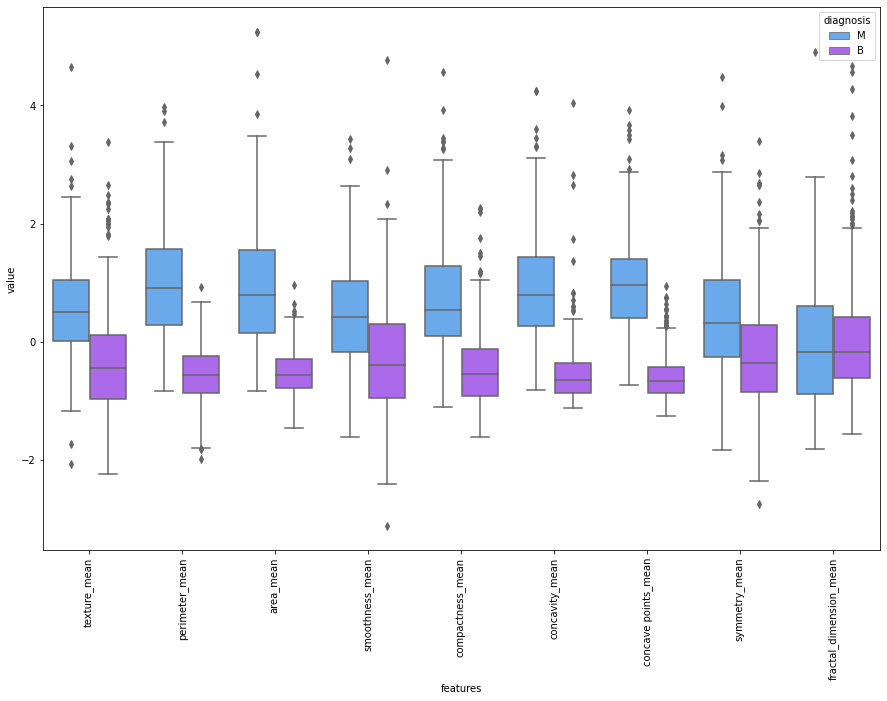

In [11]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'cool')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'texture_mean'),
  Text(1, 0, 'perimeter_mean'),
  Text(2, 0, 'area_mean'),
  Text(3, 0, 'smoothness_mean'),
  Text(4, 0, 'compactness_mean'),
  Text(5, 0, 'concavity_mean'),
  Text(6, 0, 'concave points_mean'),
  Text(7, 0, 'symmetry_mean'),
  Text(8, 0, 'fractal_dimension_mean')])

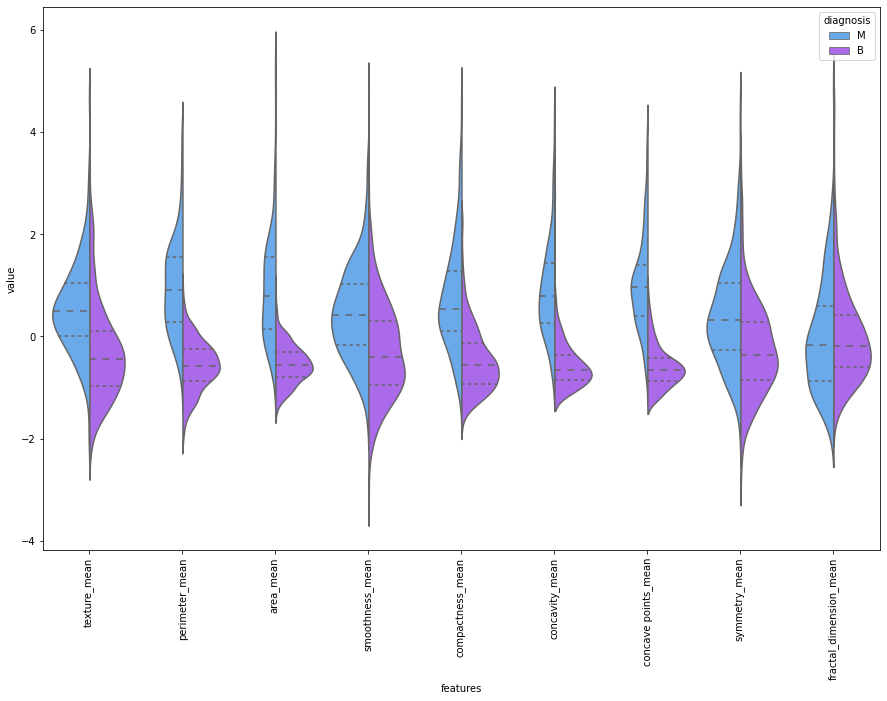

In [12]:
plt.figure(figsize=(15, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=df, palette = 'cool', split = True, inner = 'quart')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'texture_mean'),
  Text(1, 0, 'perimeter_mean'),
  Text(2, 0, 'area_mean'),
  Text(3, 0, 'smoothness_mean'),
  Text(4, 0, 'compactness_mean'),
  Text(5, 0, 'concavity_mean'),
  Text(6, 0, 'concave points_mean'),
  Text(7, 0, 'symmetry_mean'),
  Text(8, 0, 'fractal_dimension_mean')])

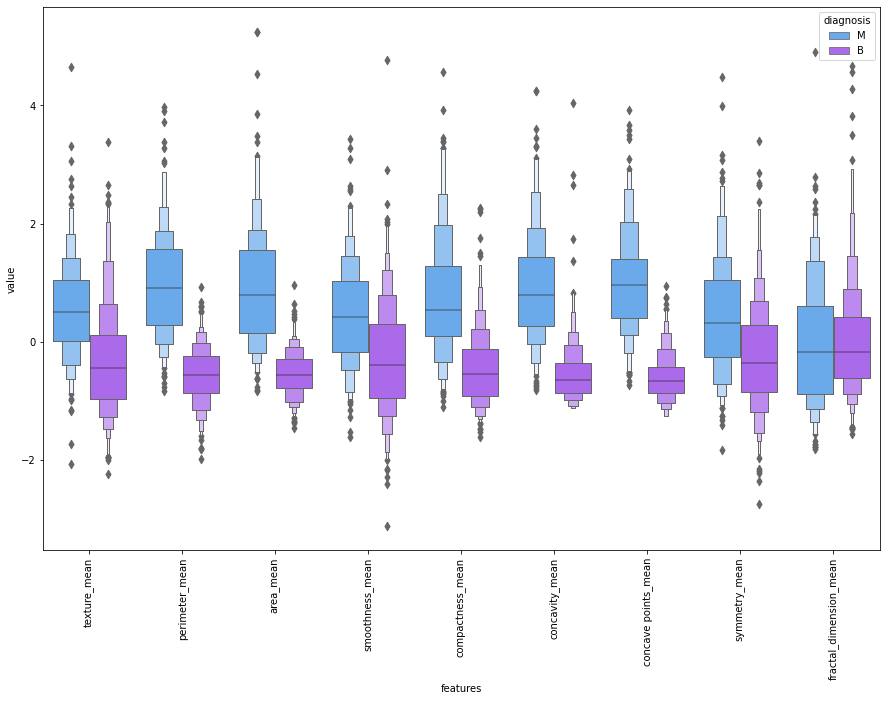

In [13]:
plt.figure(figsize=(15, 10))
sns.boxenplot(x="features", y="value", hue="diagnosis", data=df, palette = 'cool')
plt.xticks(rotation = 90)

In [14]:
data_malignant = data[data['diagnosis'] == 'M']
data_benign = data[data['diagnosis'] == 'B']

In [15]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
# Distplot
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
for feature in features:
    fig = ff.create_distplot(hist_data = [data_malignant[feature], data_benign[feature]],
                       group_labels = ['Benign','Malignant'],
                       bin_size = [0.5, 0.5],
                       curve_type = 'kde',
                       show_hist = True
                       )
    fig['layout'].update(title = feature)

    iplot(fig)

<AxesSubplot:>

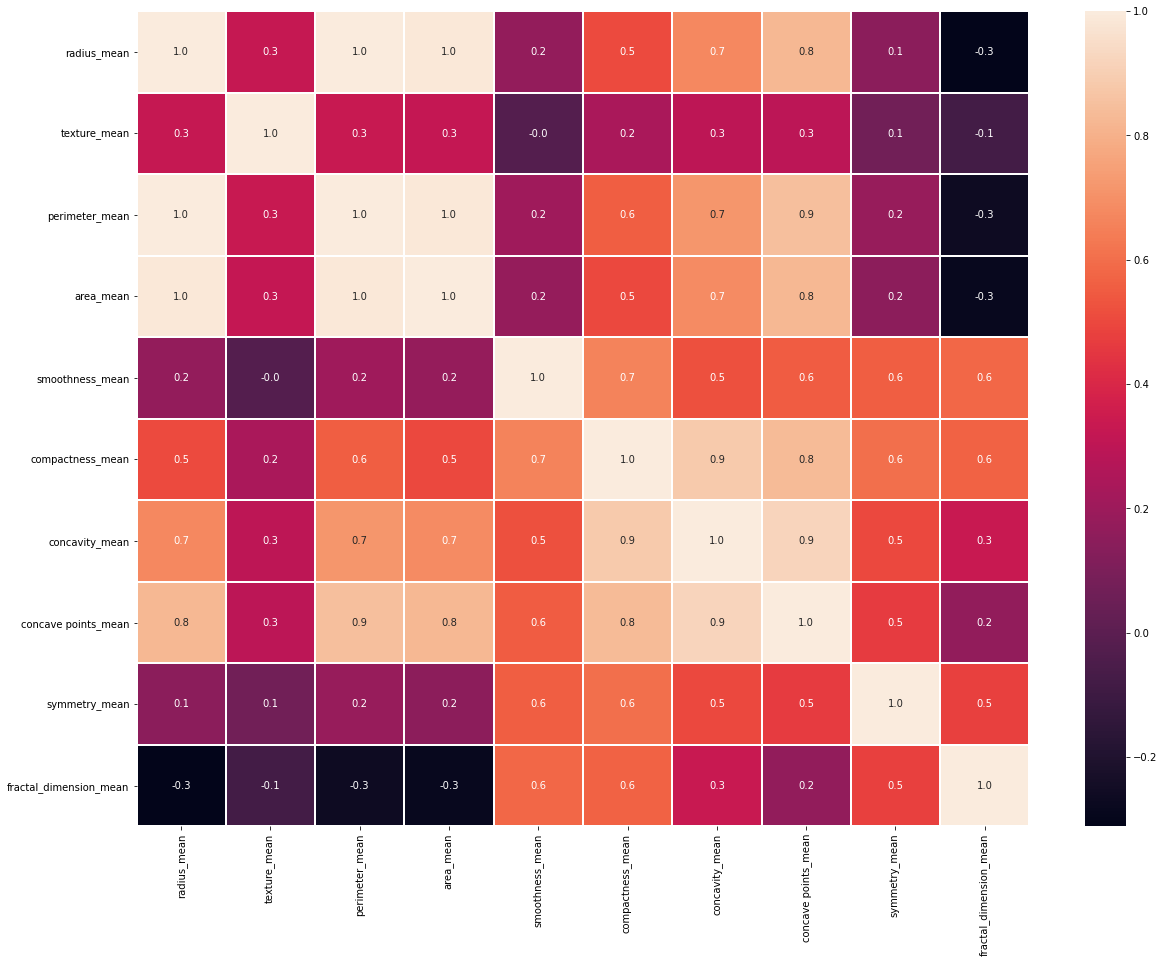

In [17]:
plt.rcParams['figure.figsize'] = (20,15)
corr_mean = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].corr()
sns.heatmap(corr_mean, annot = True, linewidths = 1, fmt = '.1f')

In [18]:
plt.rcParams['figure.figsize'] = (20,15)
corr_mean = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].corr()
x = corr_mean.columns
y = corr_mean.index
z = corr_mean.values
fig = go.Figure(data=go.Heatmap(
          x = x,
          y = y,
          z = z,
          text = z,
          type = 'heatmap',
          colorscale = 'ylgnbu'))

fig['layout'].update(width = 900, height = 900)

iplot(fig)

In [19]:
fig = make_subplots(rows=2, cols=2)


fig.add_trace(go.Scatter(
    x = data['perimeter_mean'],
    y = data['radius_mean'],
    mode = 'markers'),
    row = 1, col = 1)

fig.add_trace(go.Scatter(
    x = data['perimeter_mean'],
    y = data['radius_mean'],
    mode = 'markers'),
    row = 2, col = 1)
fig.add_trace(go.Scatter(
    x = data['radius_worst'],
    y = data['radius_mean'],
    mode = 'markers'),
    row = 2, col = 2)

fig.add_trace(go.Scatter(
    x = data['perimeter_worst'],
    y = data['radius_mean'],
    mode = 'markers'),
    row = 1, col = 2)

fig.update_layout(go.Layout(title = ' Positive Correlation '))
iplot(fig)

In [20]:
# Precision / Recall / F1 Score
def show_metrics(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(' Precision Score {:.3f}'.format(precision))
    print(' Recall Score {:.3f}'.format(recall))
    print(' F1 Score {:.3f}'.format(f1score))
    print(' Accuracy Score {:.3f}'.format(accuracy))

In [21]:
# ROC Curve
def plot_roc_curve(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6,4)
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label = 'ROC Curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.title('ROC Curve')
    return fpr, tpr

In [22]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (4, 4)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, linewidths = 0.5)

In [23]:
# Precision Recall Curve
# Precision Recall Curve
def plot_precision_recall_metrics(y_test, y_pred):
    plt.rcParams['figure.figsize'] = (6,4)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, linewidth = 2)
    plt.fill_between(recall, precision, alpha = 0.2, color = 'b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    return precision, recall

## 3. Model Training

In [24]:
# Independent & Dependent Variable
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
X = data.drop('diagnosis', axis = 'columns')
y = data['diagnosis']

In [25]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 1. Random Forest Classifier

In [27]:
# Random Forest Classifier without parameter
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
show_metrics(y_test, rf_pred)

 Precision Score 0.984
 Recall Score 0.952
 F1 Score 0.968
 Accuracy Score 0.977


(array([0.36842105, 0.98360656, 1.        ]),
 array([1.        , 0.95238095, 0.        ]))

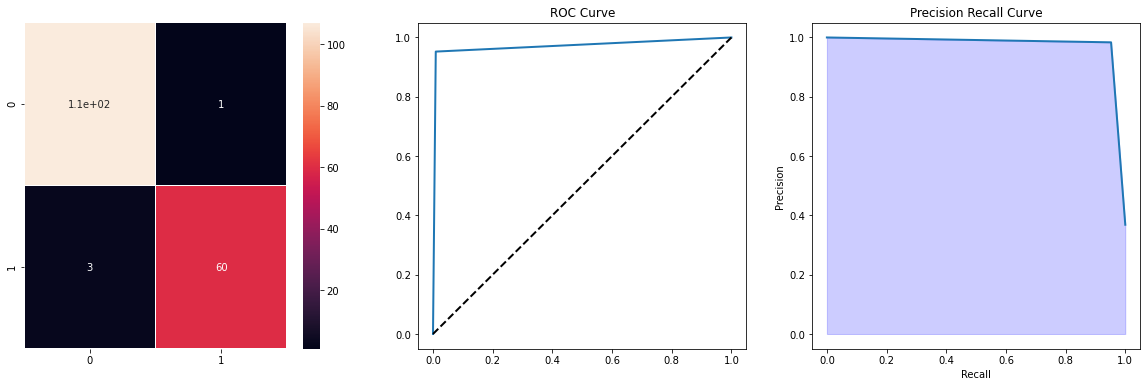

In [28]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(131)
plot_confusion_matrix(y_test, rf_pred)

plt.subplot(132)
plot_roc_curve(y_test, rf_pred)

plt.subplot(133)
plot_precision_recall_metrics(y_test, rf_pred)

In [29]:
# Hyperparameter tunning for Random Forest
params = {
            'n_estimators': [100, 200, 500],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10]
}
cv = GridSearchCV(estimator = rf_model, param_grid = params, scoring = 'f1', verbose = 10, n_jobs = -1)
cv.fit(X_train, y_train)
print(cv.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

{'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   18.0s finished


In [30]:
# Random Forest best Hyperparameter 
rf_model = RandomForestClassifier(max_features = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)
show_metrics(y_test, rf_pred)

 Precision Score 0.984
 Recall Score 0.952
 F1 Score 0.968
 Accuracy Score 0.977


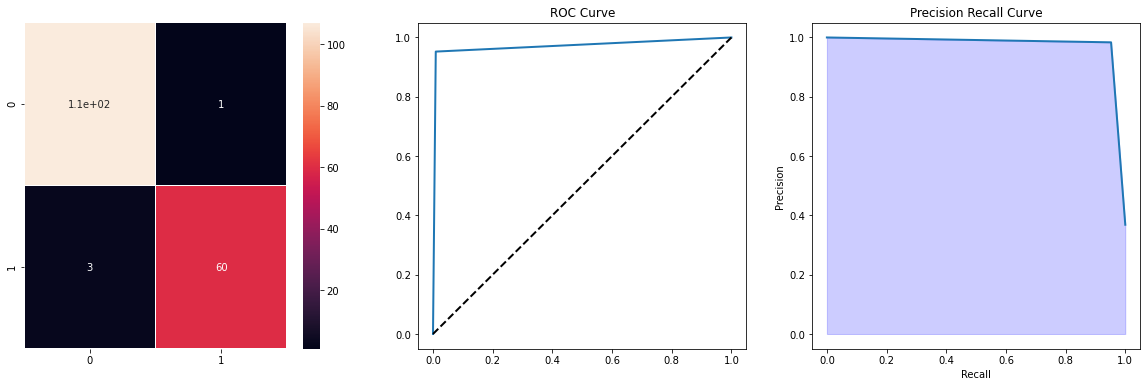

In [31]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(131)
plot_confusion_matrix(y_test, rf_pred)

plt.subplot(132)
rf_fpr, rf_tpr = plot_roc_curve(y_test, rf_pred)

plt.subplot(133)
rf_precision, rf_recall = plot_precision_recall_metrics(y_test, rf_pred)

### 2. Logistic Regression

In [32]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
show_metrics(y_test, lr_pred)

 Precision Score 0.983
 Recall Score 0.937
 F1 Score 0.959
 Accuracy Score 0.971


D:\Program Files\Anaconda\envs\BreastCancerPrediction-Classification\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [33]:
# Hyper parameter tunning
params = {
            'penalty' : ['l1','l2'], 
            'class_weight' : ['balanced', None], 
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv = GridSearchCV(estimator = lr_model, param_grid = params, n_jobs = -1, scoring = 'f1', verbose = 10)
cv.fit(X_train, y_train)
print(cv.best_params_)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0469s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1491s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1262s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    0.3s


{'C': 100, 'class_weight': None, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 102 out of 140 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 132 out of 140 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.5s finished
D:\Program Files\Anaconda\envs\BreastCancerPrediction-Classification\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [34]:
# Best Hyper parameter
lr_model = LogisticRegression( C = 100, class_weight = None, penalty = 'l2')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
show_metrics(y_test, lr_pred)

 Precision Score 0.968
 Recall Score 0.952
 F1 Score 0.960
 Accuracy Score 0.971


D:\Program Files\Anaconda\envs\BreastCancerPrediction-Classification\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



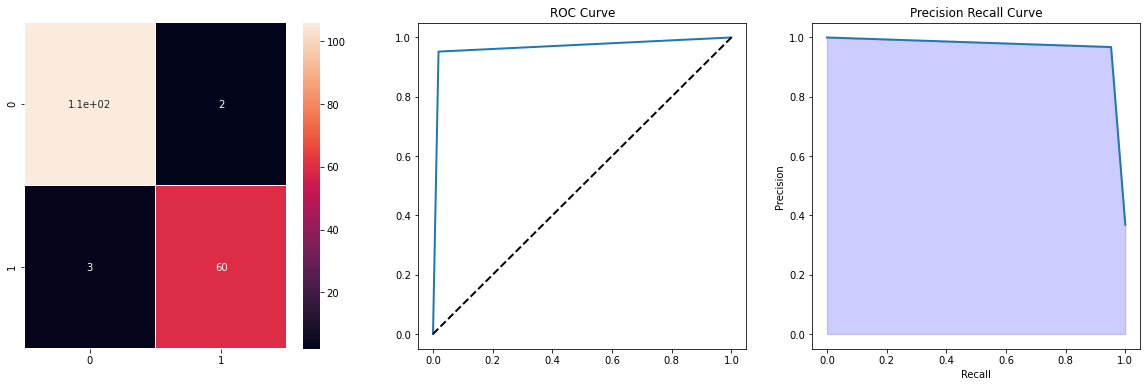

In [35]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(131)
plot_confusion_matrix(y_test, lr_pred)

plt.subplot(132)
lr_fpr, lr_tpr = plot_roc_curve(y_test, lr_pred)

plt.subplot(133)
lr_precision, lr_recall = plot_precision_recall_metrics(y_test, lr_pred)

### 3. SVM Classifier

In [36]:
# SVM 
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
show_metrics(y_test, svm_pred)

 Precision Score 1.000
 Recall Score 0.825
 F1 Score 0.904
 Accuracy Score 0.936


In [37]:
# SVM : Hyper paramter tunning 
params = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
cv = GridSearchCV(estimator = svm_model, param_grid = params, n_jobs = -1, verbose = 2, scoring = 'f1')
cv.fit(X_train, y_train)
print(cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   16.0s finished


{'C': 10, 'kernel': 'linear'}


In [38]:
svm_model = SVC(C = 10, kernel = 'linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
show_metrics(y_test, svm_pred)

 Precision Score 0.952
 Recall Score 0.952
 F1 Score 0.952
 Accuracy Score 0.965


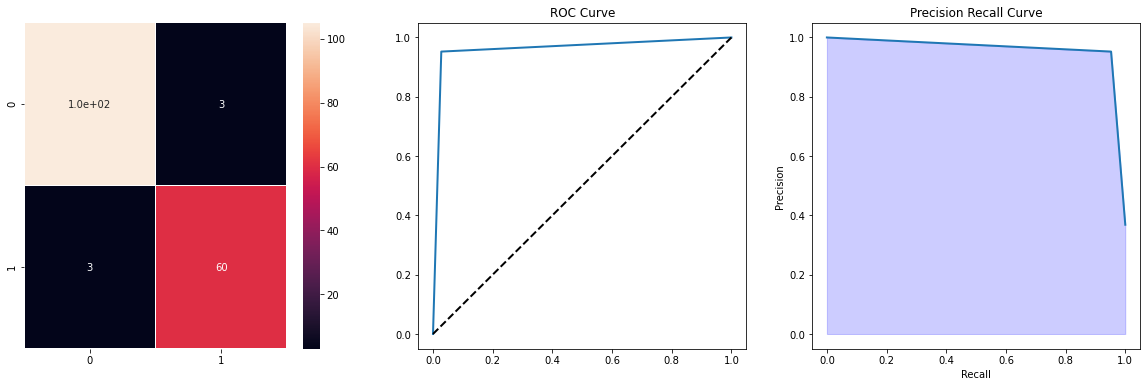

In [39]:
plt.rcParams['figure.figsize'] = (20, 6)
plt.subplot(131)
plot_confusion_matrix(y_test, svm_pred)

plt.subplot(132)
svm_fpr, svm_tpr = plot_roc_curve(y_test, svm_pred)

plt.subplot(133)
svm_precision, svm_recall = plot_precision_recall_metrics(y_test, svm_pred)

In [40]:
# Roc curve for all models

def roc_curve_all_models():
    plt.rcParams['figure.figsize'] = (12,8)
    plt.plot(lr_fpr, lr_tpr, label = 'ROC', linewidth = 2)
    plt.plot(rf_fpr, rf_tpr, label = 'ROC', linewidth = 2)
    plt.plot(svm_fpr, svm_tpr, label = 'ROC', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [41]:
# Precision Recall curve all models

def precision_recall_all_models():
    plt.rcParams['figure.figsize'] = (12,8)
    plt.plot(lr_recall, lr_precision, linewidth = 2)
    plt.plot(rf_recall, rf_precision, linewidth = 2)
    plt.plot(svm_recall, svm_precision, linewidth = 2)
    plt.fill_between(lr_recall, lr_precision, alpha = 0.2, color = 'b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(['Logistic', 'Random Forest', 'SVM'], loc='upper right')

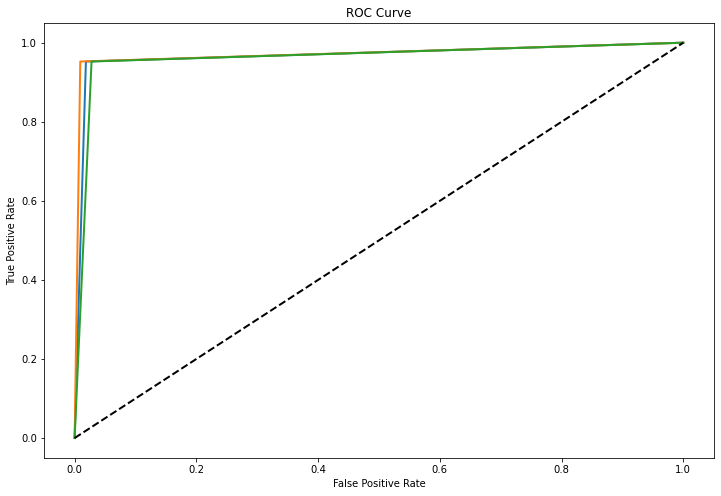

In [42]:
roc_curve_all_models()

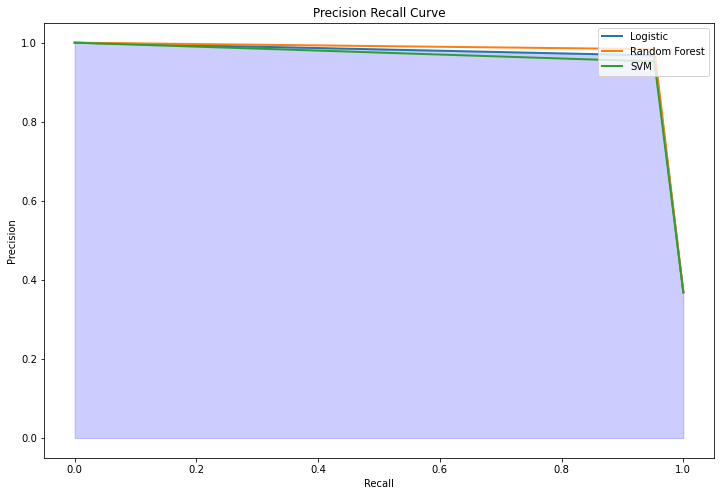

In [43]:
precision_recall_all_models()